<a href="https://colab.research.google.com/github/Madhavi2233/Madhavi2303A52233/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LOGISTIC REGRESSION

   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-nu

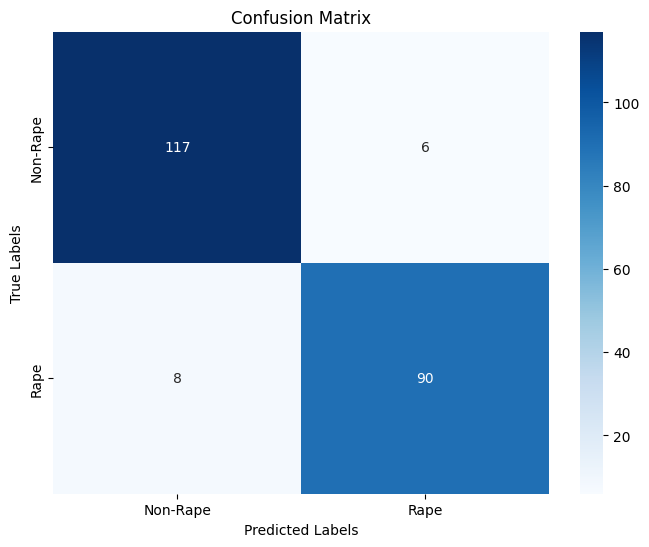

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
file_path = '/content/CrimesOnWomenData.csv'  # Update the path if necessary
data = pd.read_csv(file_path)

# 2. Inspect the dataset
print(data.head())
print(data.info())

# 3. Preprocessing
# Drop unnecessary columns
data_cleaned = data.drop(columns=['Unnamed: 0', 'State', 'Year'])

# Binarize the target column ('Rape')
threshold = data_cleaned['Rape'].median()
data_cleaned['Rape_binary'] = (data_cleaned['Rape'] > threshold).astype(int)

# Define features and target
X = data_cleaned.drop(columns=['Rape', 'Rape_binary'])
y = data_cleaned['Rape_binary']

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter in case of convergence issues
model.fit(X_train, y_train)

# 6. Make predictions
y_pred = model.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# 8. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Rape', 'Rape'],
            yticklabels=['Non-Rape', 'Rape'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#SUPPORT VECTOR MACHINE

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       123
           1       0.93      0.95      0.94        98

    accuracy                           0.95       221
   macro avg       0.94      0.95      0.95       221
weighted avg       0.95      0.95      0.95       221



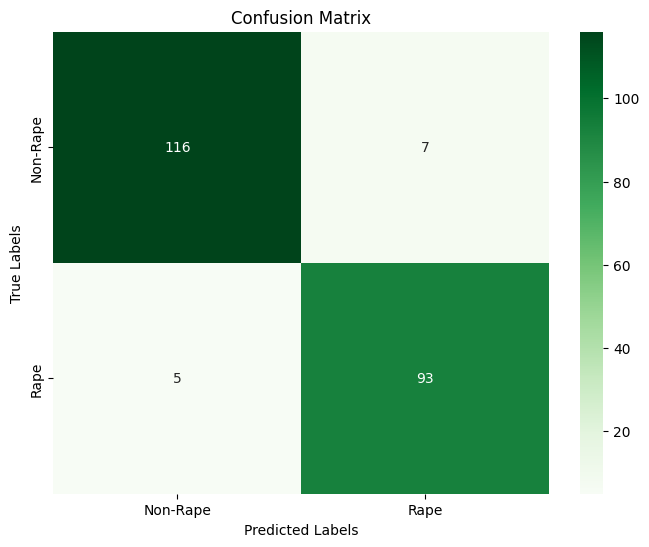

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preprocessing: Features and target (reusing from previous steps)
X = data_cleaned.drop(columns=['Rape', 'Rape_binary'])
y = data_cleaned['Rape_binary']

# 2. Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Initialize and train the SVM classifier
svm_model = SVC(kernel='linear', C=1)  # Using linear kernel; adjust C for regularization
svm_model.fit(X_train, y_train)

# 4. Make predictions
y_pred = svm_model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# 6. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non-Rape', 'Rape'],
            yticklabels=['Non-Rape', 'Rape'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#RANDOM FOREST

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       123
           1       0.97      0.97      0.97        98

    accuracy                           0.97       221
   macro avg       0.97      0.97      0.97       221
weighted avg       0.97      0.97      0.97       221



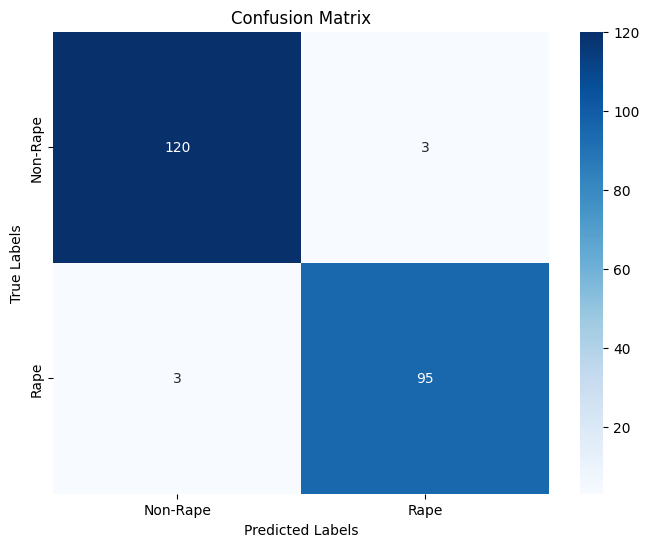

<ipython-input-14-afc6ed3e83c1>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


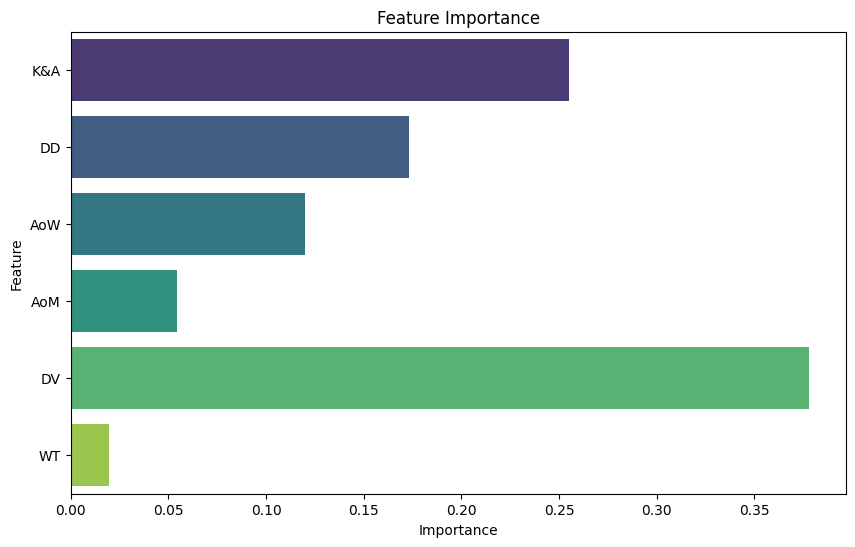

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preprocessing: Features and target (reusing from previous steps)
X = data_cleaned.drop(columns=['Rape', 'Rape_binary'])
y = data_cleaned['Rape_binary']

# 2. Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Make predictions
y_pred = rf_model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# 6. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Rape', 'Rape'],
            yticklabels=['Non-Rape', 'Rape'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 7. Feature Importance Visualization
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
#K-NEAREST NEIGHBORS

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       123
           1       0.96      0.95      0.95        98

    accuracy                           0.96       221
   macro avg       0.96      0.96      0.96       221
weighted avg       0.96      0.96      0.96       221



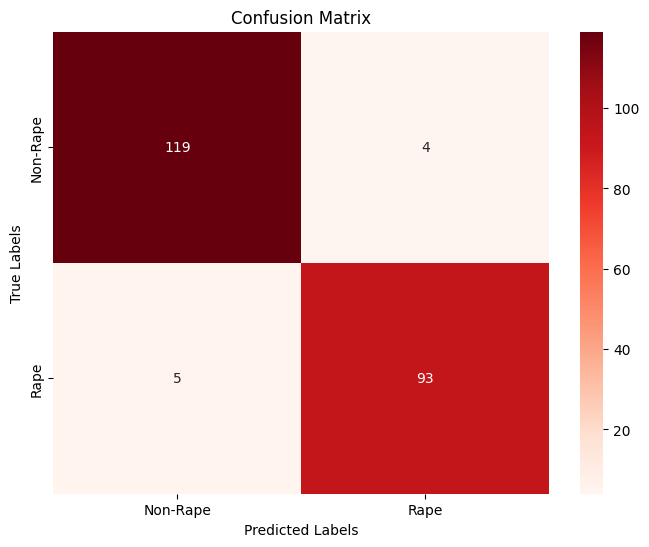

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preprocessing: Features and target (reusing from previous steps)
X = data_cleaned.drop(columns=['Rape', 'Rape_binary'])
y = data_cleaned['Rape_binary']

# 2. Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Initialize and train the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default is 5 neighbors
knn_model.fit(X_train, y_train)

# 4. Make predictions
y_pred = knn_model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# 6. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Non-Rape', 'Rape'],
            yticklabels=['Non-Rape', 'Rape'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


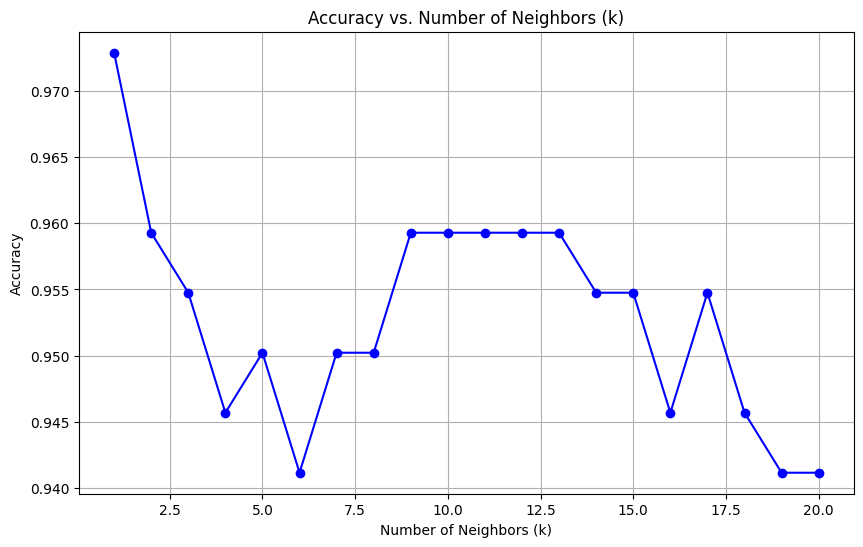

Best k: 1, Accuracy: 0.97


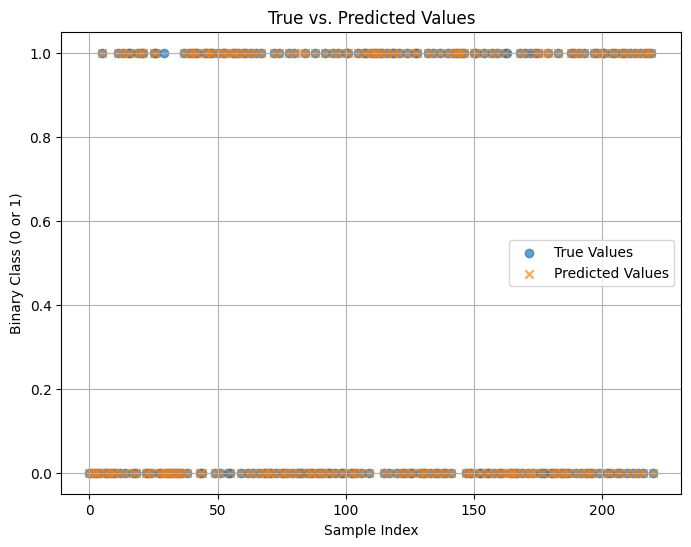

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Normalize Features for KNN (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 3. Initialize variables for accuracy vs. k plot
k_values = range(1, 21)  # Testing k from 1 to 20
accuracies = []

# 4. Loop to compute accuracy for different k values
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# 5. Plot Accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# 6. Best k and Confusion Matrix
best_k = k_values[np.argmax(accuracies)]
print(f"Best k: {best_k}, Accuracy: {max(accuracies):.2f}")

# Retrain KNN with best k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# 7. True vs. Predicted Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='True Values', alpha=0.7)
plt.scatter(range(len(y_test)), y_pred, label='Predicted Values', alpha=0.7, marker='x')
plt.title('True vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Binary Class (0 or 1)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#DECISION TREE

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       123
           1       0.92      0.96      0.94        98

    accuracy                           0.95       221
   macro avg       0.94      0.95      0.95       221
weighted avg       0.95      0.95      0.95       221



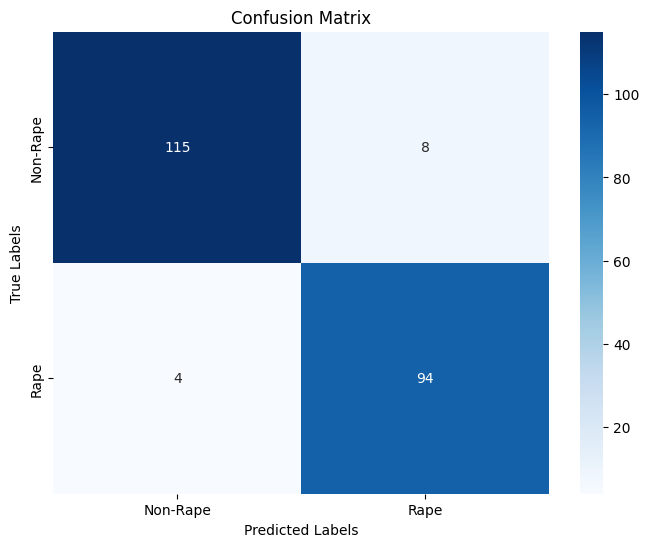

<ipython-input-18-e25a3f03992c>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


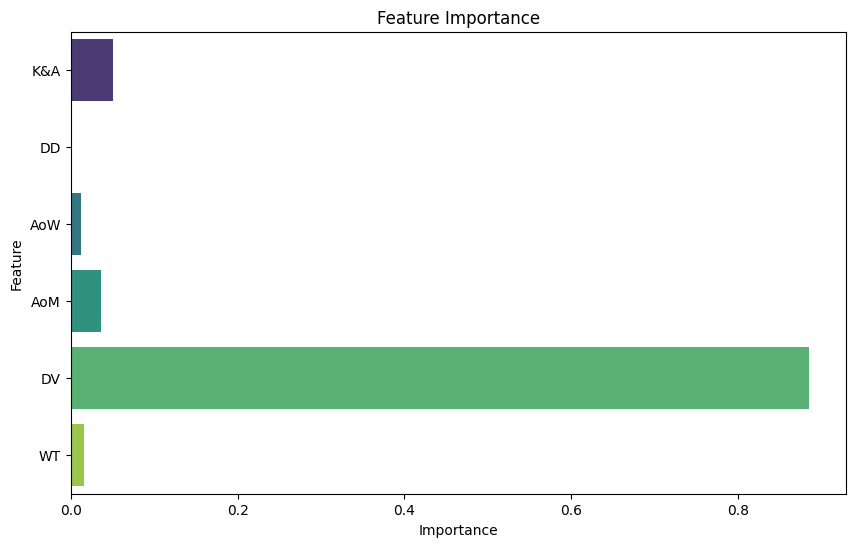

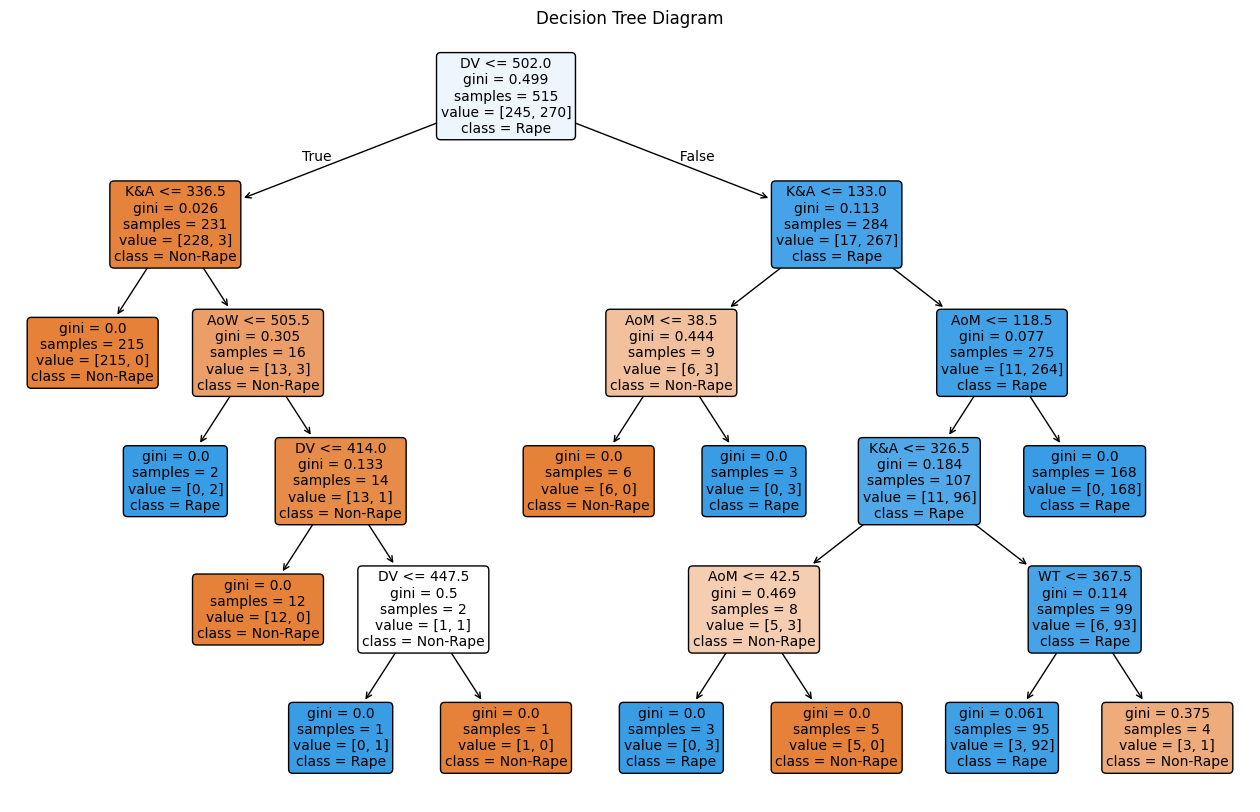

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Features and target (reusing from previous steps)
X = data_cleaned.drop(columns=['Rape', 'Rape_binary'])
y = data_cleaned['Rape_binary']

# 2. Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Limit depth for interpretability
dt_model.fit(X_train, y_train)

# 4. Make predictions
y_pred = dt_model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# 6. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Rape', 'Rape'],
            yticklabels=['Non-Rape', 'Rape'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 7. Feature Importance Visualization
feature_importances = dt_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 8. Decision Tree Diagram
plt.figure(figsize=(16, 10))
plot_tree(dt_model, feature_names=features, class_names=['Non-Rape', 'Rape'],
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Diagram')
plt.show()
